# **Setting up the Data**

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json


with open('historical_data.json', 'r') as f:
    data = json.load(f)


records = []
for record in data:
    records.append({
        "User ID": record["user_id"],
        "Quiz ID": record["quiz_id"],
        "Topic": record["quiz"]["topic"],
        "Accuracy (%)": float(record["accuracy"].replace("%", "")),
        "Score": float(record["score"]),
        "Speed": int(record["speed"]),
        "Final Score": float(record["final_score"]),
        "Negative Score": float(record["negative_score"]),
        "Correct Answers": record["correct_answers"],
        "Incorrect Answers": record["incorrect_answers"],
        "Better Than": record["better_than"],
        "Mistakes Corrected": record["mistakes_corrected"],
        "Initial Mistakes": record["initial_mistake_count"],
        "Submitted At": record["submitted_at"]
    })

df = pd.DataFrame(records)

df["Topic"] = df["Topic"].str.lower().str.strip()


# **1) Analyze the Data**


**Explore the schema and identify patterns in student performance by topics, difficulty levels, and response accuracy**

In [43]:
average_accuracy = df.groupby("Topic")["Accuracy (%)"].mean()

print("Average Accuracy by Topic:")
print(average_accuracy)

Average Accuracy by Topic:
Topic
body fluids and circulation                 76.166667
human health and disease                    93.000000
human reproduction                          38.000000
microbes in human welfare                  100.000000
principles of inheritance and variation     30.000000
reproductive health                         75.666667
respiration and gas exchange                66.000000
Name: Accuracy (%), dtype: float64


In [44]:
average_final_score = df.groupby("Topic")["Final Score"].mean()

print("\nAverage Final Score by Topic:")
print(average_final_score)


Average Final Score by Topic:
Topic
body fluids and circulation                 65.000000
human health and disease                   110.000000
human reproduction                          24.000000
microbes in human welfare                   76.000000
principles of inheritance and variation      5.000000
reproductive health                         45.333333
respiration and gas exchange                21.000000
Name: Final Score, dtype: float64


In [45]:
average_speed = df.groupby("Topic")["Speed"].mean()

print("\nAverage Speed by Topic:")
print(average_speed)


Average Speed by Topic:
Topic
body fluids and circulation                 95.666667
human health and disease                   100.000000
human reproduction                          86.000000
microbes in human welfare                   95.000000
principles of inheritance and variation    100.000000
reproductive health                         95.333333
respiration and gas exchange                90.000000
Name: Speed, dtype: float64


In [46]:
average_better_than = df.groupby("Topic")["Better Than"].mean()

print("\nAverage Better Than by Topic:")
print(average_better_than)


Average Better Than by Topic:
Topic
body fluids and circulation                159.333333
human health and disease                   270.000000
human reproduction                          43.000000
microbes in human welfare                  375.000000
principles of inheritance and variation     18.000000
reproductive health                        185.000000
respiration and gas exchange                23.000000
Name: Better Than, dtype: float64


# **2) Generate Insights**

**Highlight weak areas, improvement trends, and performance gaps for a given user.**

**Identifying Weak Areas**

<ipython-input-50-1f4661ae1321>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_accuracy.index, y=average_accuracy.values, palette="viridis")


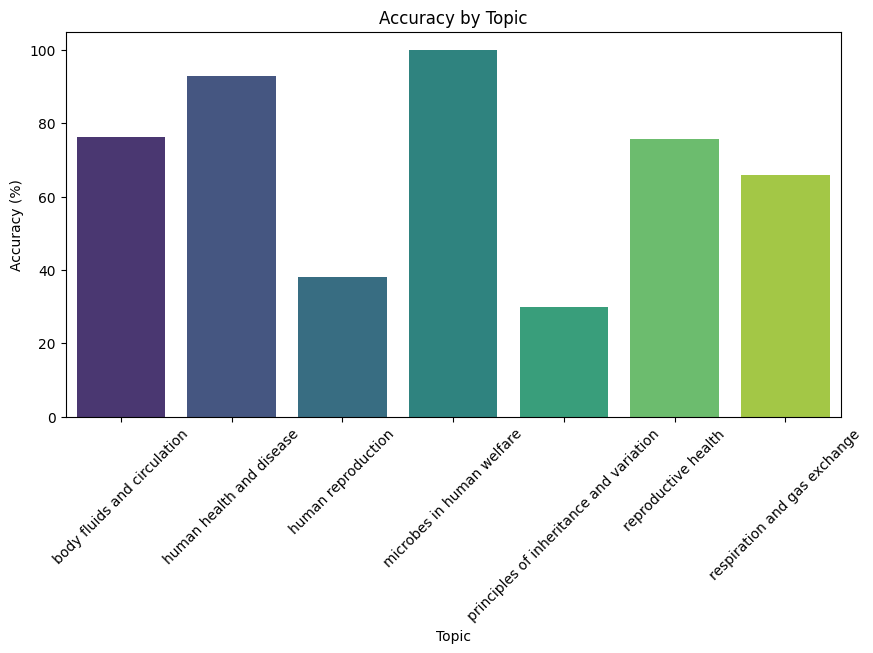

In [50]:
plt.figure(figsize=(10, 5))
sns.barplot(x=average_accuracy.index, y=average_accuracy.values, palette="viridis")
plt.title("Accuracy by Topic")
plt.xticks(rotation=45)
plt.ylabel("Accuracy (%)")
plt.xlabel("Topic")
plt.show()

<ipython-input-51-cb41d45ddd3c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_final_score.index, y=average_final_score.values, palette="coolwarm")


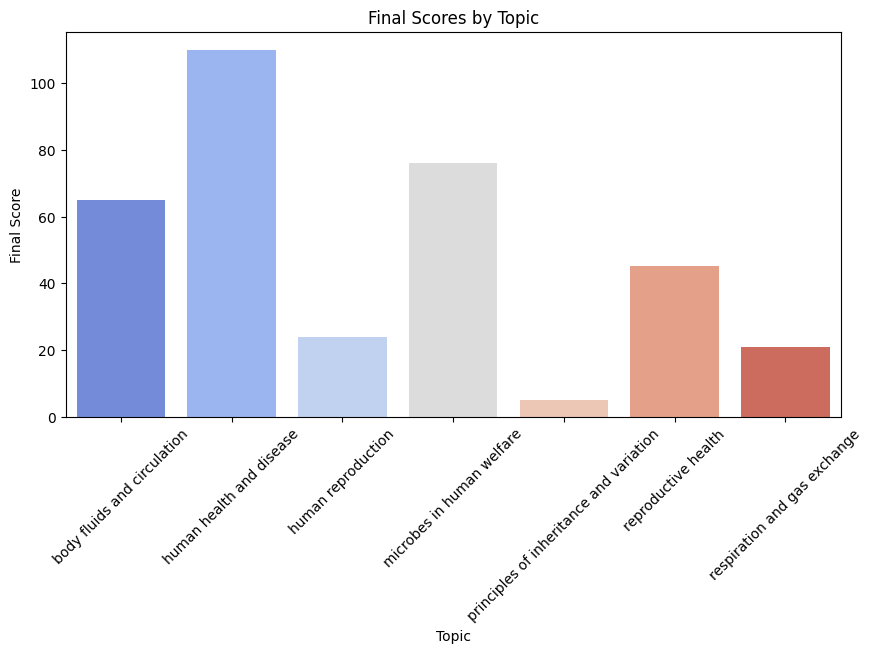

In [51]:
plt.figure(figsize=(10, 5))
sns.barplot(x=average_final_score.index, y=average_final_score.values, palette="coolwarm")
plt.title("Final Scores by Topic")
plt.xticks(rotation=45)
plt.ylabel("Final Score")
plt.xlabel("Topic")
plt.show()

<ipython-input-52-9f2816e7257f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Topic", y="Speed", data=average_speed_by_topic, palette="viridis")


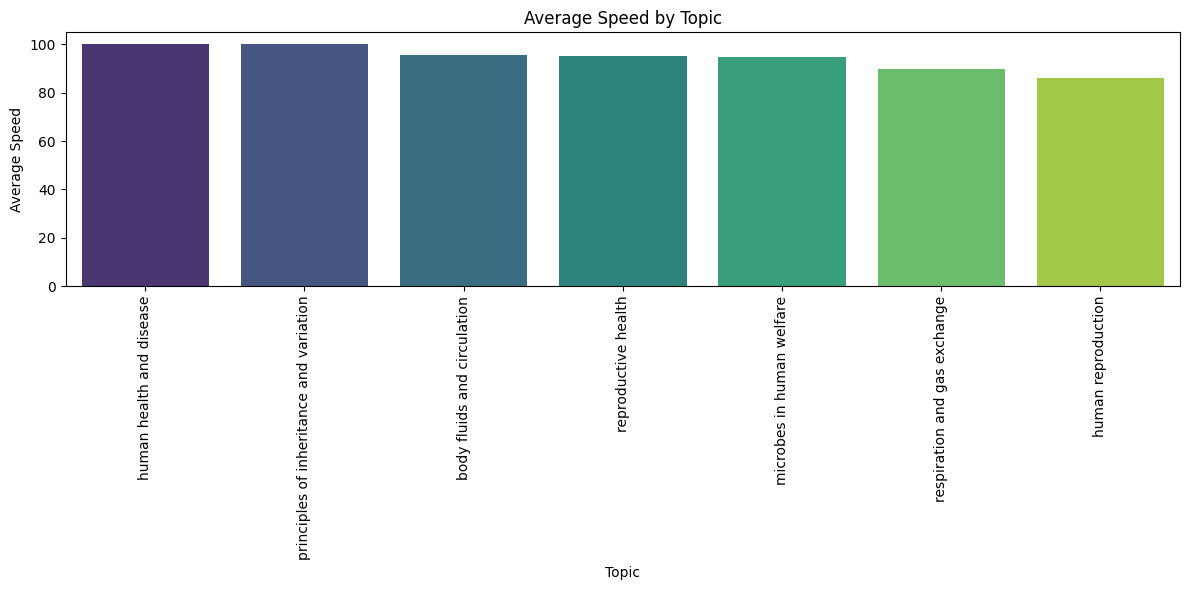

In [52]:
average_speed_by_topic = df.groupby("Topic")["Speed"].mean().reset_index()

average_speed_by_topic = average_speed_by_topic.sort_values(by="Speed", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="Topic", y="Speed", data=average_speed_by_topic, palette="viridis")

plt.xticks(rotation=90)

plt.title('Average Speed by Topic')
plt.xlabel('Topic')
plt.ylabel('Average Speed')

plt.tight_layout()
plt.show()

<ipython-input-53-8aadc4c6a95b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Topic", y="Better Than", data=average_better_than_by_topic, palette="coolwarm")


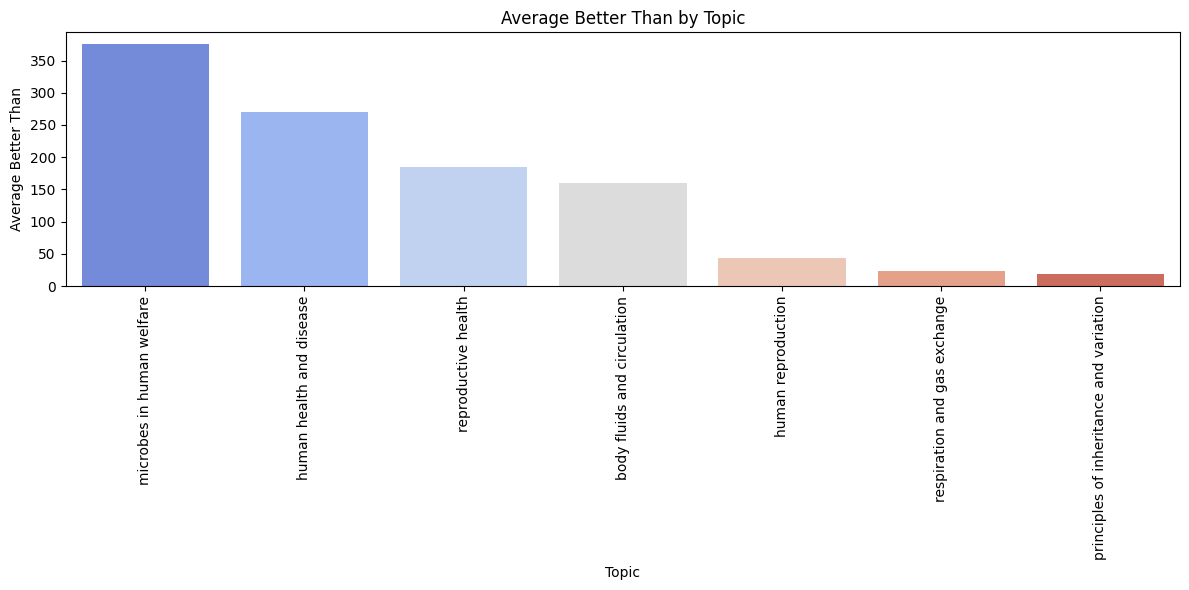

In [53]:
average_better_than_by_topic = df.groupby("Topic")["Better Than"].mean().reset_index()

average_better_than_by_topic = average_better_than_by_topic.sort_values(by="Better Than", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="Topic", y="Better Than", data=average_better_than_by_topic, palette="coolwarm")


plt.xticks(rotation=90)

plt.title('Average Better Than by Topic')
plt.xlabel('Topic')
plt.ylabel('Average Better Than')

plt.tight_layout()
plt.show()

<ipython-input-59-b5ddcae6c7aa>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_negative_scores_by_topic, x='Topic', y='Negative Score', palette="Blues_d")


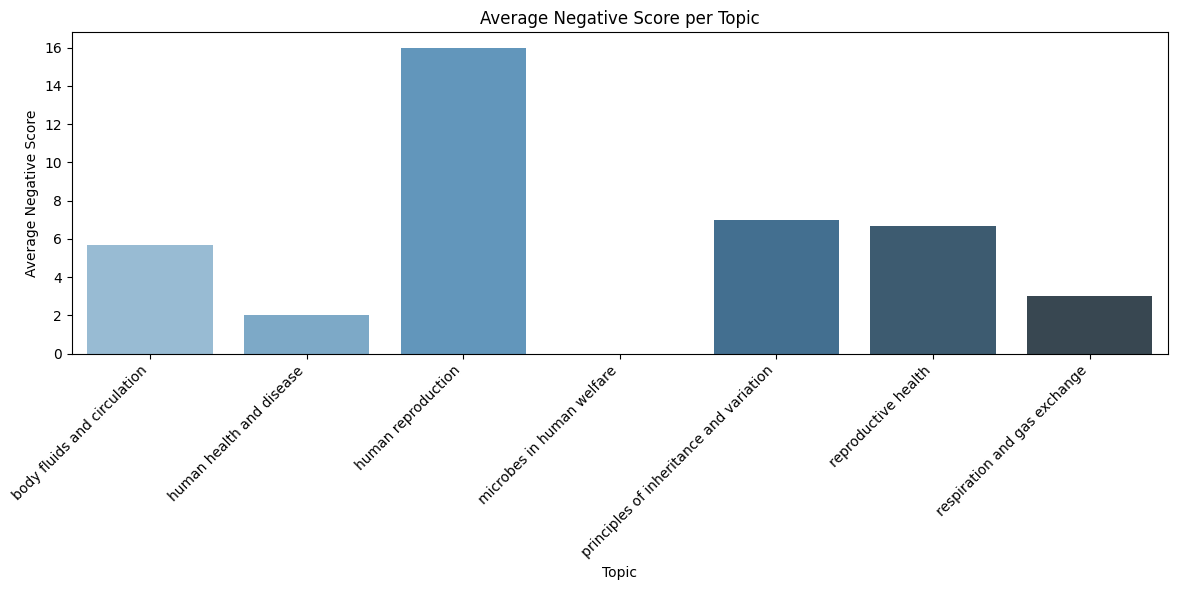

In [59]:
avg_negative_scores_by_topic = df.groupby('Topic')['Negative Score'].mean().reset_index()

df['Submitted At'] = pd.to_datetime(df['Submitted At'])

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_negative_scores_by_topic, x='Topic', y='Negative Score', palette="Blues_d")
plt.title('Average Negative Score per Topic')
plt.xlabel('Topic')
plt.ylabel('Average Negative Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<ipython-input-60-f5d9659b90b9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_negative_scores_by_date, x='Submitted At', y='Negative Score', palette="Reds_d")


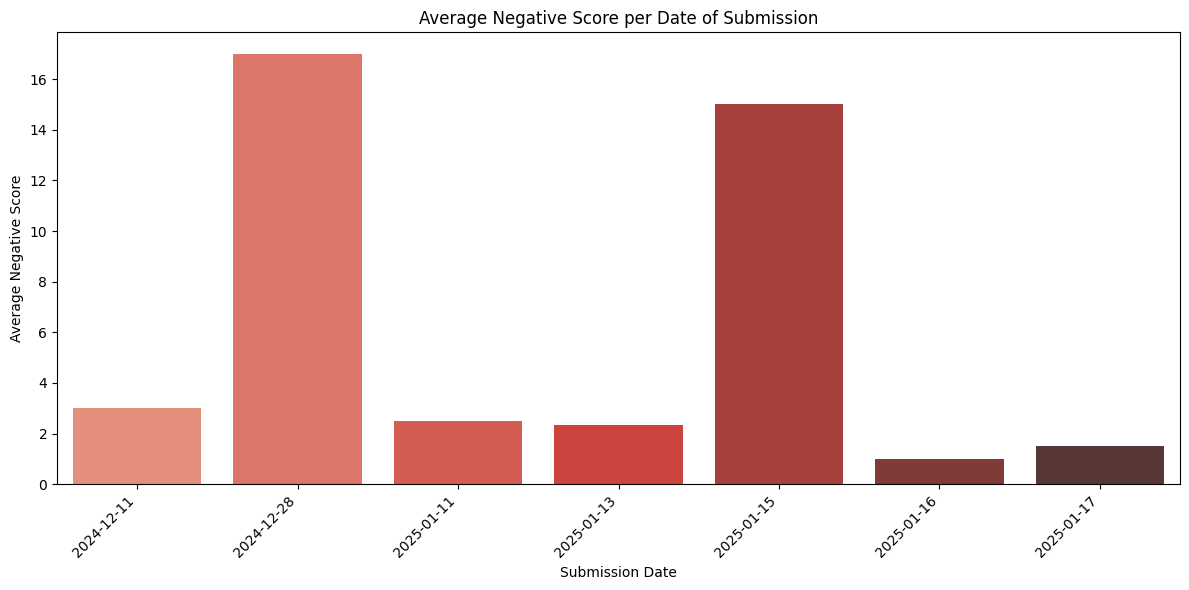

In [60]:
avg_negative_scores_by_date = df.groupby(df['Submitted At'].dt.date)['Negative Score'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_negative_scores_by_date, x='Submitted At', y='Negative Score', palette="Reds_d")
plt.title('Average Negative Score per Date of Submission')
plt.xlabel('Submission Date')
plt.ylabel('Average Negative Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



*   Human Reproduction: Accuracy of 38% is low, and the negative score of 16 indicates frequent incorrect responses. This suggests confusion with the concepts or difficulty applying them.

* Principles of Inheritance and Variation: With an accuracy of 30% and a moderate negative score of 8, this topic also highlights a major gap in understanding.

*   Crowd Ranking is extremely low for Human Repproduction, Principles of Inheritance and Variation and Respiration and Gas Exchange, indicating lack of foundation in these topics.

*  Low accuracy, high negative scores, and poor crowd ranking suggest these need focused attention.



**Identifying Improvement Trends**

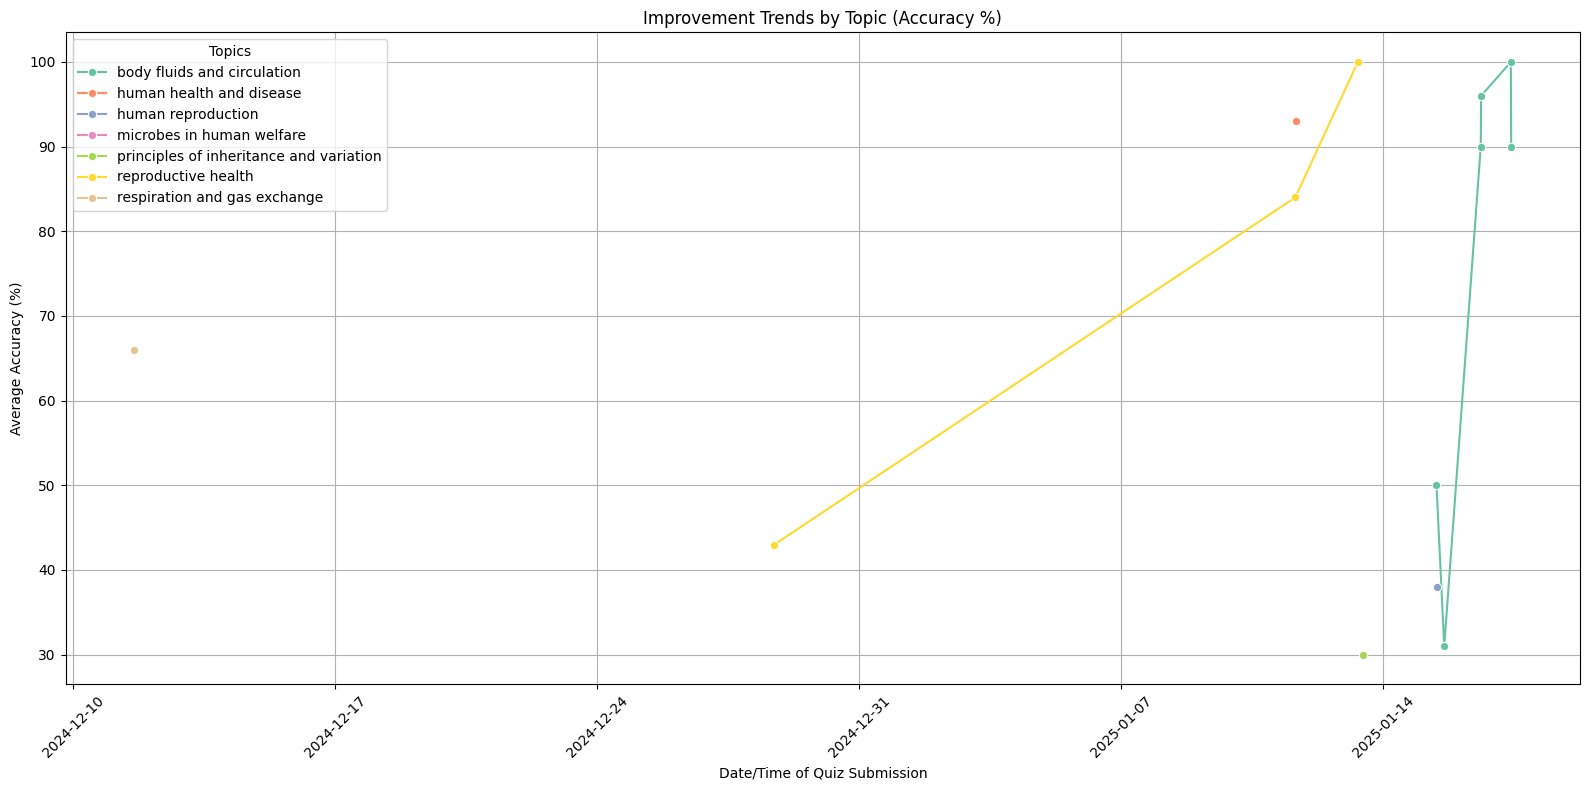

In [56]:
df["Submitted At"] = pd.to_datetime(df["Submitted At"])

df_grouped = df.groupby(['Topic', 'Submitted At'])['Accuracy (%)'].mean().reset_index()

plt.figure(figsize=(16, 8))

sns.lineplot(data=df_grouped, x="Submitted At", y="Accuracy (%)", hue="Topic", marker='o', palette="Set2")


plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.WeekdayLocator())


plt.title('Improvement Trends by Topic (Accuracy %)')
plt.xlabel('Date/Time of Quiz Submission')
plt.ylabel('Average Accuracy (%)')
plt.legend(title='Topics')

plt.xticks(rotation=45)


plt.grid(True)


plt.tight_layout()
plt.show()



*   Reproductive Health shows steady improvement with fewer negative scores and higher accuracy. This indicates the student is applying learned strategies effectively.

*   Body Fluids and Circulation exhibits slight inconsistencies but is on an upward trend overall.



**Identifying Performance Gaps**

Low Accuracy Topics:
                                     Topic  Accuracy (%)
2                       human reproduction          38.0
4  principles of inheritance and variation          30.0

Time-Consuming Topics (Low Speed):
                          Topic  Speed
2            human reproduction   86.0
3     microbes in human welfare   95.0
6  respiration and gas exchange   90.0

Topics with High Initial Mistakes (Knowledge Gaps):
                                     Topic  Initial Mistakes  Mistakes Corrected
0              body fluids and circulation                58                  24
1                 human health and disease                14                  12
2                       human reproduction                16                   0
4  principles of inheritance and variation                 7                   0
5                      reproductive health                20                   0


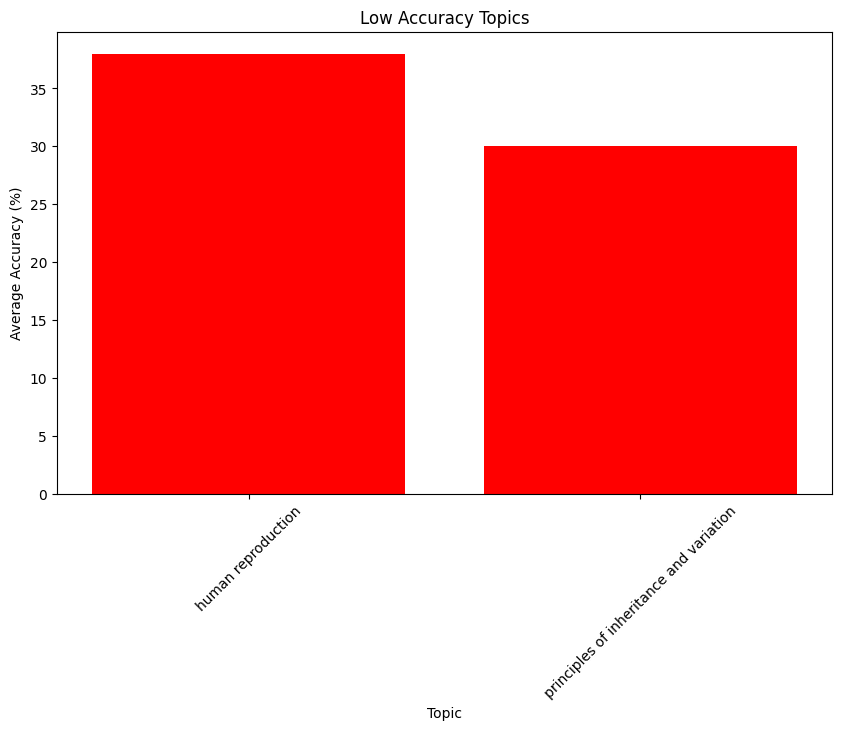

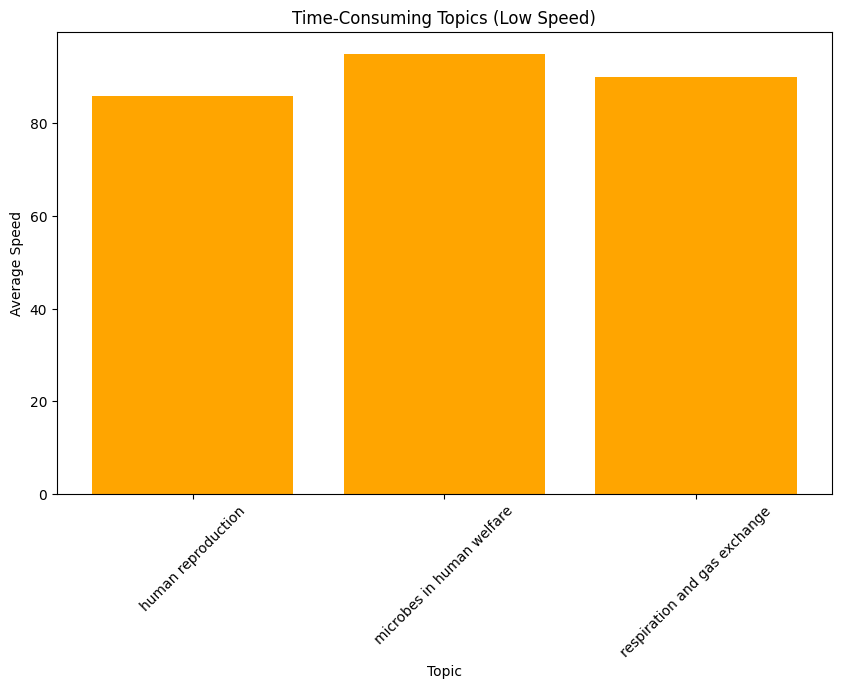

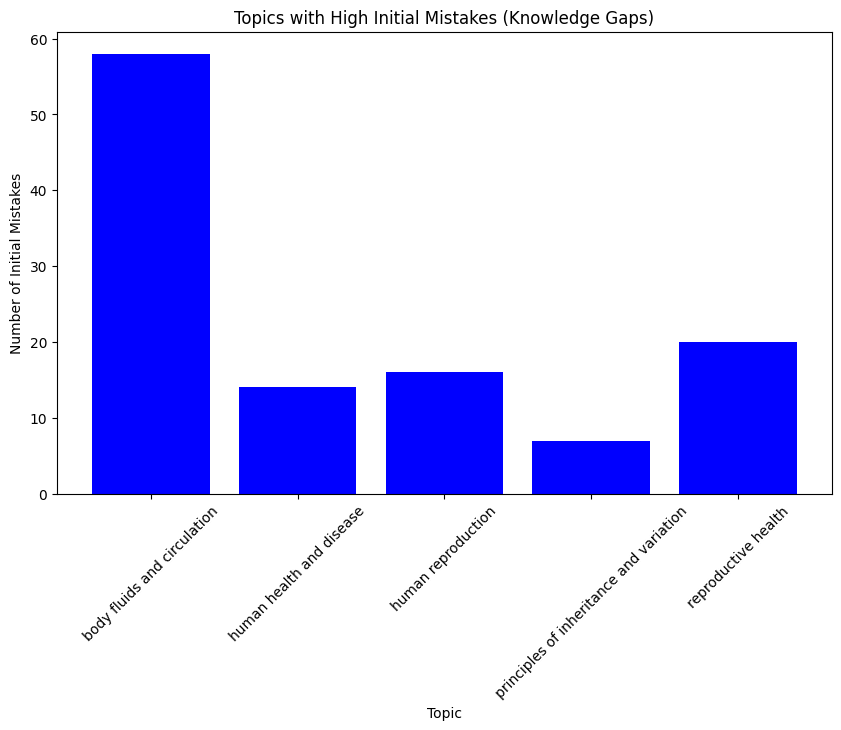

In [62]:
accuracy_by_topic = df.groupby('Topic')['Accuracy (%)'].mean().reset_index()

low_accuracy_topics = accuracy_by_topic[accuracy_by_topic['Accuracy (%)'] < 60]

print("Low Accuracy Topics:")
print(low_accuracy_topics)

speed_by_topic = df.groupby('Topic')['Speed'].mean().reset_index()


slow_topics = speed_by_topic[speed_by_topic['Speed'] < df['Speed'].mean()]

print("\nTime-Consuming Topics (Low Speed):")
print(slow_topics)


mistakes_by_topic = df.groupby('Topic')[['Initial Mistakes', 'Mistakes Corrected']].sum().reset_index()


high_mistakes_topics = mistakes_by_topic[mistakes_by_topic['Initial Mistakes'] > 5]

print("\nTopics with High Initial Mistakes (Knowledge Gaps):")
print(high_mistakes_topics)


performance_gaps = pd.merge(low_accuracy_topics, speed_by_topic, on='Topic', how='outer')
performance_gaps = pd.merge(performance_gaps, mistakes_by_topic[['Topic', 'Initial Mistakes']], on='Topic', how='outer')


plt.figure(figsize=(10, 6))
plt.bar(low_accuracy_topics['Topic'], low_accuracy_topics['Accuracy (%)'], color='red')
plt.title('Low Accuracy Topics')
plt.xlabel('Topic')
plt.ylabel('Average Accuracy (%)')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10, 6))
plt.bar(slow_topics['Topic'], slow_topics['Speed'], color='orange')
plt.title('Time-Consuming Topics (Low Speed)')
plt.xlabel('Topic')
plt.ylabel('Average Speed')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10, 6))
plt.bar(high_mistakes_topics['Topic'], high_mistakes_topics['Initial Mistakes'], color='blue')
plt.title('Topics with High Initial Mistakes (Knowledge Gaps)')
plt.xlabel('Topic')
plt.ylabel('Number of Initial Mistakes')
plt.xticks(rotation=45)
plt.show()


<ipython-input-61-ecb8669eddee>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_mistakes_corrected_by_topic, x='Topic', y='Mistakes Corrected', palette="Purples_d")


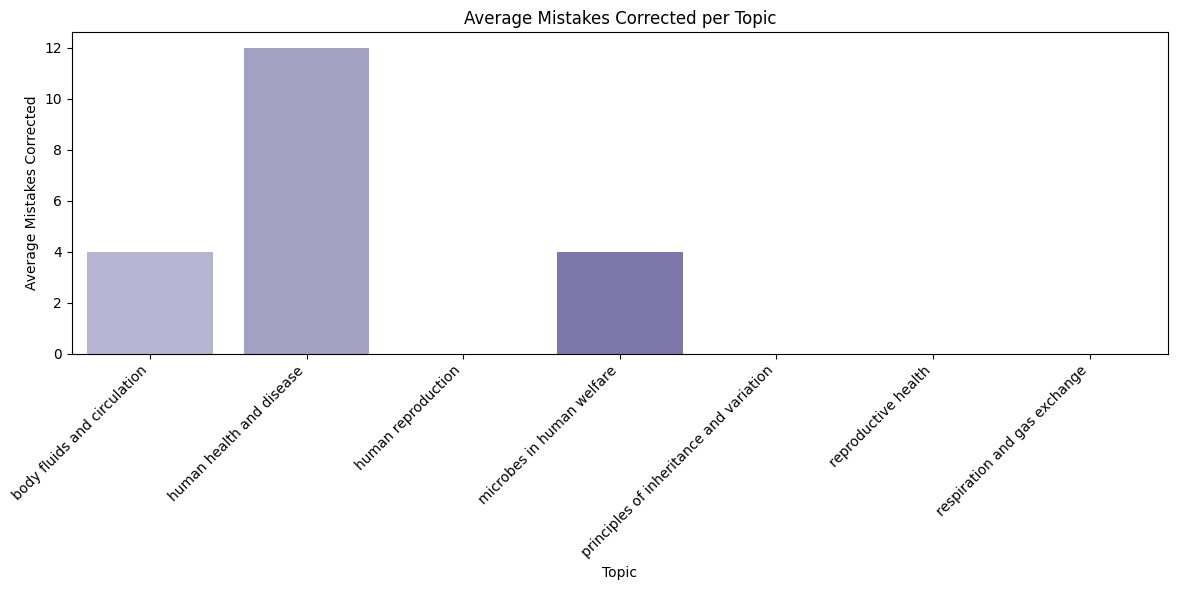

In [61]:
avg_mistakes_corrected_by_topic = df.groupby('Topic')['Mistakes Corrected'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_mistakes_corrected_by_topic, x='Topic', y='Mistakes Corrected', palette="Purples_d")
plt.title('Average Mistakes Corrected per Topic')
plt.xlabel('Topic')
plt.ylabel('Average Mistakes Corrected')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


*   Human Reproduction: The student struggles both conceptually (low accuracy) and strategically (high errors). Despite attempting to correct mistakes, gaps in understanding persist.
*   Principles of Inheritance and Variation: This topic has a critical performance gap with low corrected mistakes and accuracy, indicating it has been neglected.
*  Body Fluids and Circulation: While accuracy is decent (76.17%), the relatively high negative score (~6) suggests overconfidence or occasional missteps.


# **3) Create Recommendations**

**Propose actionable steps for the user to improve, such as suggested topics, question types, or difficulty levels to focus on.**

### **Recommendations Based on Data Analysis**

#### **For Weak Topics:**

1. **Human Reproduction:**
   - The student should focus on reducing negative scores by thoroughly reviewing foundational concepts.
   - It is important to prioritize deeper understanding rather than attempting more questions without clarity.
   - Practicing simpler questions first will help the student build accuracy and confidence before progressing to more complex ones.

2. **Principles of Inheritance and Variation:**
   - The student needs to address the low number of mistakes corrected by actively reviewing incorrect answers.
   - Practice quizzes should be used to identify and resolve specific problem areas.

---

#### **For Intermediate Topics:**

1. **Body Fluids and Circulation:**
   - The student should reduce avoidable mistakes by reviewing error-prone areas identified in previous quizzes.
   - Improving precision is essential to maintaining high accuracy and reducing negative marking.

---

#### **For Strong Topics:**

1. **Microbes in Human Welfare:**
   - The student should maintain the current level of accuracy while challenging themselves with more application-based or advanced questions to continue excelling.
   
2. **Human Health and Disease:**
   - The student should continue leveraging their high mistake-correction rate to refine understanding and sustain high accuracy.
   - Regular revision will further minimize errors and solidify their performance.

---


# **Bonus Points**


**Analyze and define the student persona based on patterns in the data.
Highlight specific strengths and weaknesses with creative labels or insights.**

#### **Student Persona: "The Consistent Improver"**

#### **Persona Overview:**
This student demonstrates a pattern of active learning and steady improvement, especially in familiar topics. They are highly motivated to correct their mistakes, but gaps in foundational knowledge limit their progress in weaker areas.


### **Strengths:**

1. **"The Accuracy Champion"**
   - Topics like Microbes in Human Welfare and Human Health and Disease reflect the student's strong grasp of content. Consistently high accuracy, coupled with minimal negative scores, shows mastery of these topics.
   - The high rate of mistakes corrected (12 for Human Health and Disease) further indicates the student's proactive learning approach.

2. **"The Quick Thinker"**
   - Speed data across most topics indicates the student maintains above-average response times. This suggests confidence and clarity when approaching familiar question types.

3. **"The Growth Seeker"**
   - Improvement trends in topics like Respiration and Gas Exchange reflect their commitment to addressing past errors and improving accuracy gradually.


### **Weaknesses:**

1. **"The Overconfident Rusher"**
   - Topics like **Body Fluids and Circulation** show decent accuracy (76%) but relatively high negative scores (~6). This suggests occasional overconfidence or carelessness, leading to avoidable mistakes.

2. **"The Abstract Avoider"**
   - Poor performance in **Principles of Inheritance and Variation** (30% accuracy, low mistake correction) highlights a struggle with abstract concepts and multi-layered reasoning. The student may avoid these questions altogether, missing opportunities to improve.


### **Creative Insights:**

1. **"Mistakes Make the Master"**
   - The student's ability to correct mistakes in strong topics (like Human Health and Disease) highlights their resilience. If applied to weaker areas, this skill could lead to significant improvements.

2. **"Pacing the Path"**
   - While quick responses are an asset, slight pauses for review could reduce negative scores in overconfident topics like Body Fluids and Circulation.

3. **"Master of the Familiar"**
   - Their strength in microbiology topics suggests they excel at understanding practical and real-world applications. Extending this mindset to abstract topics through relatable examples could bridge the gap.


By leveraging their strengths and addressing their weaknesses, this student can transform from a "Consistent Improver" into a "Well-Rounded Achiever."